In [407]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestClassifier

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

# Features

In [408]:
set(train_df.columns)

{'Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket'}

# Title

Extract title from name and make a new feature

In [409]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 
                                                 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 

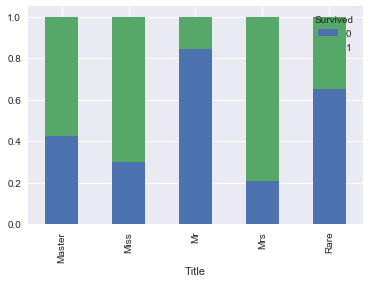

In [410]:
tab = pd.crosstab(train_df['Title'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

Convert categorical data to numerical data

In [411]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

# SibSp and Parch

In [412]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
    dataset['IsAlone'] = dataset['FamilySize'] == 0
    dataset['LargeFamily'] = dataset['FamilySize'] >= 4

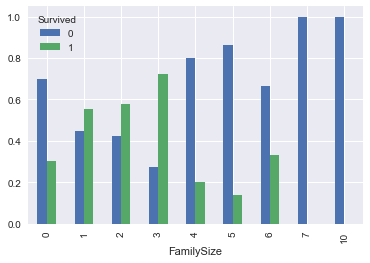

In [413]:
tab = pd.crosstab(train_df['FamilySize'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

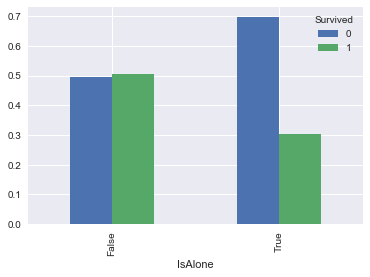

In [414]:
tab = pd.crosstab(train_df['IsAlone'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

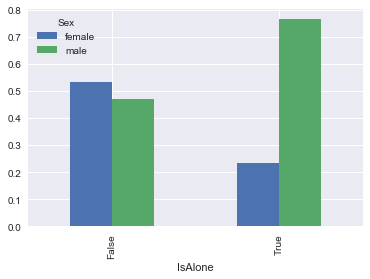

In [415]:
tab = pd.crosstab(train_df['IsAlone'], train_df['Sex'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

A new feature "SingleMan" looks quite promising

In [416]:
for dataset in combine:
    dataset['SingleMan'] = (dataset['IsAlone'] == True) & (dataset['Sex'] == 'male')

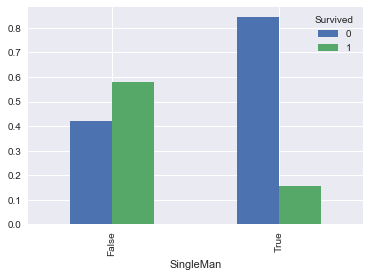

In [417]:
tab = pd.crosstab(train_df['SingleMan'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

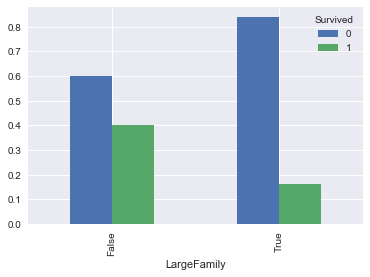

In [418]:
tab = pd.crosstab(train_df['LargeFamily'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

# Cabin

In [419]:
train_df['Cabin'].isnull().sum()

687

In [420]:
for dataset in combine:
    dataset['CabinIsNull'] = dataset['Cabin'].isnull()

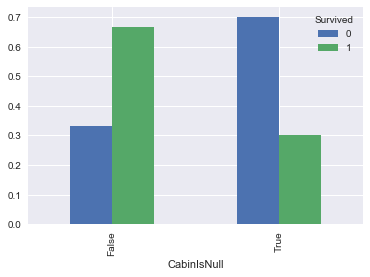

In [421]:
tab = pd.crosstab(train_df['CabinIsNull'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

# Deck

In [422]:
for dataset in combine:
    dataset['Deck'] = dataset['Cabin'].str[0]
    dataset['Deck'] = dataset['Deck'].fillna(value='U')
    dataset['Deck'] = dataset['Deck'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8,'U':0})

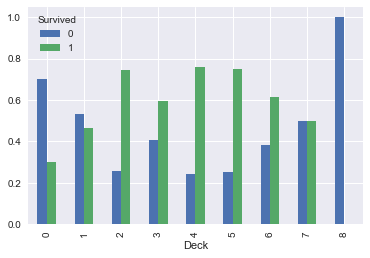

In [423]:
tab = pd.crosstab(train_df['Deck'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

# Ticket

In [424]:
for dataset in combine:
    dataset["TicketType"] = dataset['Ticket'].str[0]

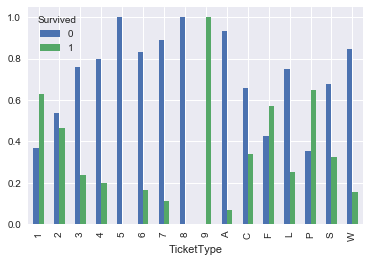

In [425]:
tab = pd.crosstab(train_df['TicketType'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

In [426]:
ticket_type = {'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,
               'A':10,'C':11,'F':12,'L':13,'P':14,'S':15,'W':16}
for dataset in combine:
    dataset['BadTicket'] = dataset['TicketType'].isin(['3','4','5','6','7','8','A','L','W'])
    dataset['TicketType'] = dataset['TicketType'].map(ticket_type)

# Age

In [427]:
age_df = train_df[train_df['Age'].isnull() == False][['Age', 'Survived']]
pd.qcut(age_df['Age'], 4).cat.categories.values

array([Interval(0.41899999999999998, 20.125, closed='right'),
       Interval(20.125, 28.0, closed='right'),
       Interval(28.0, 38.0, closed='right'),
       Interval(38.0, 80.0, closed='right')], dtype=object)

In [428]:
for dataset in combine:
    dataset['AgeIsNull'] = dataset['Age'].isnull()

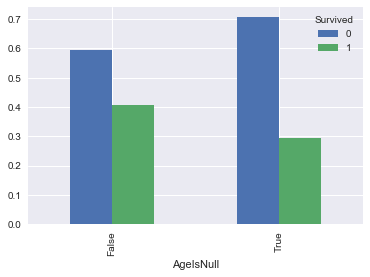

In [429]:
tab = pd.crosstab(train_df['AgeIsNull'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

In [430]:
for dataset in combine:
    dataset.loc[ dataset['Age'].isnull(), 'Age'] = 0
    dataset.loc[ (dataset['Age'] > 0) & (dataset['Age'] <= 20.125), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20.125) & (dataset['Age'] <= 28), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 38), 'Age']   = 3
    dataset.loc[ dataset['Age'] > 38, 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)

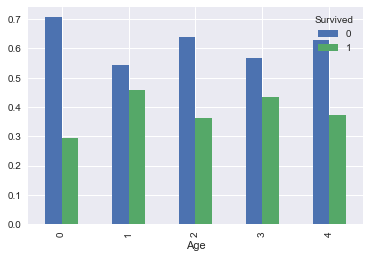

In [431]:
tab = pd.crosstab(train_df['Age'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

In [339]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,FamilySize,IsAlone,LargeFamily,SingleMan,CabinIsNull,Deck,TicketType,BadTicket,AgeIsNull
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,...,1,1,False,False,False,True,0,10,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,...,3,1,False,False,False,False,3,14,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,...,2,0,True,False,False,True,0,15,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,53.1000,...,3,1,False,False,False,False,3,1,False,False
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,8.0500,...,1,0,True,False,True,True,0,3,True,False
5,6,0,3,"Moran, Mr. James",male,1,0,0,330877,8.4583,...,1,0,True,False,True,True,0,3,True,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,4,0,0,17463,51.8625,...,1,0,True,False,True,False,5,1,False,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,1,3,1,349909,21.0750,...,4,4,False,True,False,True,0,3,True,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,2,0,2,347742,11.1333,...,3,2,False,False,False,True,0,3,True,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,1,0,237736,30.0708,...,3,1,False,False,False,True,0,2,False,False


# Fare

In [432]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

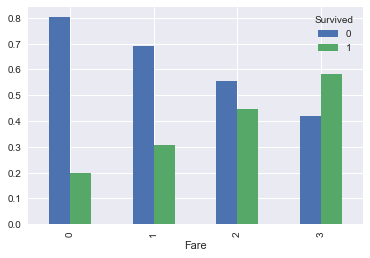

In [433]:
tab = pd.crosstab(train_df['Fare'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

# Machine Learning

In [434]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [435]:
features = ['Pclass', 'Sex', 'TicketType', 'AgeIsNull', 'Fare', 'Age',
            'Embarked', 'Title', 'IsAlone', 'SingleMan', 'BadTicket',
            'FamilySize', 'CabinIsNull', 'Deck']
X_train = train_df[features]
Y_train = train_df['Survived']
X_test = test_df[features]

In [439]:
from sklearn.model_selection import cross_val_score
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
cross_val_score(random_forest, X_train, Y_train, cv=5).mean()

0.81260843460871346